In [115]:
# IMPORTING DEPENDECIES

import requests
import json
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np

# Spacex Launchpad API

In [30]:
# URL TO REQUEST AND RETRIVE DATA

url = "https://api.spacexdata.com/v2/launchpads"

In [31]:
# CONVERTING JSON FORMAT FOR ALL LAUNCHPADS

response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "attempted_launches": 5,
        "details": "SpaceX original launch site, where all of the Falcon 1 launches occured. Abandoned as SpaceX decided against upgrading the pad to support Falcon 9.",
        "full_name": "Kwajalein Atoll Omelek Island",
        "id": "kwajalein_atoll",
        "location": {
            "latitude": 9.0477206,
            "longitude": 167.7431292,
            "name": "Omelek Island",
            "region": "Marshall Islands"
        },
        "padid": 1,
        "status": "retired",
        "successful_launches": 2,
        "vehicles_launched": [
            "Falcon 1"
        ],
        "wikipedia": "https://en.wikipedia.org/wiki/Omelek_Island"
    },
    {
        "attempted_launches": 40,
        "details": "SpaceX primary Falcon 9 launch pad, where all east coast Falcon 9s launched prior to the AMOS-6 anomaly. Initially used to launch Titan rockets for Lockheed Martin. Back online since CRS-13 on 2017-12-15.",
        "full_name": "Cape Ca

In [138]:
# ExTRACTING THE MEANINFUL DATA 

Launchpad_df = pd.DataFrame(response)

Launchpad_df = Launchpad_df.rename(columns={ "vehicles_launched": "name" })
Launchpad_df = Launchpad_df.set_index("name")

Launchpad_launch = Launchpad_df.drop(columns=["details", "full_name","padid","id", "location", "status","wikipedia"])

Launchpad_launch = Launchpad_launch.groupby(["attempted_launches","successful_launches"])


Launchpad_launch.head()



,attempted_launches,successful_launches
name,,
[Falcon 1],5,2
[Falcon 9],40,38
"[Falcon 9, Falcon Heavy]",15,15
[Falcon 1],0,0
[Falcon 9],14,14
[Falcon 9],0,0


# Spacex Rocket API

In [23]:
# THE SOME PROCESS ABOVE, BUT NOW FOR "ROCKETS"

url = "https://api.spacexdata.com/v2/rockets"
response = requests.get(url)
response_json = response.json()
print(json.dumps(response_json, indent=4, sort_keys=True))


[
    {
        "active": false,
        "boosters": 0,
        "company": "SpaceX",
        "cost_per_launch": 6700000,
        "country": "Republic of the Marshall Islands",
        "description": "The Falcon 1 was an expendable launch system privately developed and manufactured by SpaceX during 2006-2009. On 28 September 2008, Falcon 1 became the first privately-developed liquid-fuel launch vehicle to go into orbit around the Earth.",
        "diameter": {
            "feet": 5.5,
            "meters": 1.68
        },
        "engines": {
            "engine_loss_max": 0,
            "layout": "single",
            "number": 1,
            "propellant_1": "liquid oxygen",
            "propellant_2": "RP-1 kerosene",
            "thrust_sea_level": {
                "kN": 420,
                "lbf": 94000
            },
            "thrust_to_weight": 96,
            "thrust_vacuum": {
                "kN": 480,
                "lbf": 110000
            },
            "type": "merlin

In [148]:
#CLEANING "DIAMETER" COLUMN

Rockets_df = pd.DataFrame(response_json)

Rockets_df['diameter'] = Rockets_df['diameter'] .map(lambda x: str(x)[10:])
Rockets_df['diameter'] = Rockets_df['diameter'] .map(lambda x: str(x)[:-13])

Rockets_df['height'] = Rockets_df['height'] .map(lambda x: str(x)[10:])
Rockets_df['height'] = Rockets_df['height'] .map(lambda x: str(x)[:-13])

Rockets_df = Rockets_df.set_index("name")


Rockets_df

,active,boosters,company,cost_per_launch,country,description,diameter,engines,first_flight,first_stage,...,id,landing_legs,mass,payload_weights,rocketid,second_stage,stages,success_rate_pct,type,wikipedia
name,,,,,,,,,,,,,,,,,,,,,
Falcon 1,False,0,SpaceX,6700000,Republic of the Marshall Islands,The Falcon 1 was an expendable launch system p...,"1.68,","{'number': 1, 'type': 'merlin', 'version': '1C...",2006-03-24,"{'reusable': False, 'engines': 1, 'fuel_amount...",...,falcon1,"{'number': 0, 'material': None}","{'kg': 30146, 'lb': 66460}","[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",1,"{'reusable': False, 'engines': 1, 'fuel_amount...",2,40,rocket,https://en.wikipedia.org/wiki/Falcon_1
Falcon 9,True,0,SpaceX,50000000,United States,Falcon 9 is a two-stage rocket designed and ma...,3.7,"{'number': 9, 'type': 'merlin', 'version': '1D...",2010-06-04,"{'reusable': True, 'engines': 9, 'fuel_amount_...",...,falcon9,"{'number': 4, 'material': 'carbon fiber'}","{'kg': 549054, 'lb': 1207920}","[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",2,"{'reusable': False, 'engines': 1, 'fuel_amount...",2,97,rocket,https://en.wikipedia.org/wiki/Falcon_9
Falcon Heavy,True,2,SpaceX,90000000,United States,With the ability to lift into orbit over 54 me...,"12.2,","{'number': 27, 'type': 'merlin', 'version': '1...",2018-02-06,"{'reusable': True, 'engines': 27, 'fuel_amount...",...,falconheavy,"{'number': 12, 'material': 'carbon fiber'}","{'kg': 1420788, 'lb': 3125735}","[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",3,"{'reusable': False, 'engines': 1, 'fuel_amount...",2,100,rocket,https://en.wikipedia.org/wiki/Falcon_Heavy
Big Falcon Rocket,False,0,SpaceX,7000000,United States,BFR is a privately funded next-generation reus...,9,"{'number': 31, 'type': 'raptor', 'version': ''...",2019-12-01,"{'reusable': True, 'engines': 31, 'fuel_amount...",...,bfr,"{'number': 4, 'material': 'carbon fiber'}","{'kg': 4400000, 'lb': 9700000}","[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",4,"{'reusable': True, 'engines': 6, 'fuel_amount_...",2,0,rocket,https://en.wikipedia.org/wiki/BFR_(rocket)


In [149]:


Rockets_df = Rockets_df.rename({"diameter" : "diameter in meters"})

Rockets_droped = Rockets_df.drop(columns=["company","country","description","engines","first_flight","first_stage",
                                          "landing_legs", "mass", "payload_weights","rocketid", "second_stage",
                                          "stages", "type", "wikipedia","flickr_images", "id",  ])


Rockets_droped

,active,boosters,cost_per_launch,diameter,height,success_rate_pct
name,,,,,,
Falcon 1,False,0,6700000,"1.68,",22.25,40
Falcon 9,True,0,50000000,3.7,"70, '",97
Falcon Heavy,True,2,90000000,"12.2,","70, '",100
Big Falcon Rocket,False,0,7000000,9,"118,",0


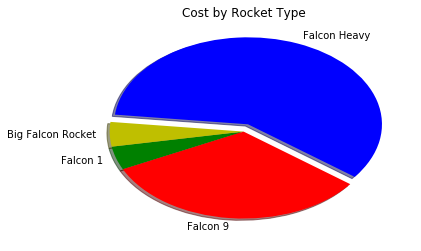

In [87]:
# PLOTING PIE CHART TO SEE CORRELATION FOR COST
colors= ["g","r", "b", "y"]
explode = [0,0,0.09,0]

Rocket_pie = plt.pie(Rockets_df["cost_per_launch"], colors=colors,explode=explode,
                     shadow=True, startangle=190,labels=Rockets_df["name"])

plt.title("Cost by Rocket Type")

plt.show()